# Importing libraries and dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('Utilities.csv')
df.sample
df.head(10)

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044
5,Florida,1.32,13.5,111,60.0,-2.2,11127,22.5,1.241
6,Hawaiian,1.22,12.2,175,67.6,2.2,7642,0.0,1.652
7,Idaho,1.10,9.2,245,57.0,3.3,13082,0.0,0.309
8,Kentucky,1.34,13.0,168,60.4,7.2,8406,0.0,0.862
9,Madison,1.12,12.4,197,53.0,2.7,6455,39.2,0.623


# EDA

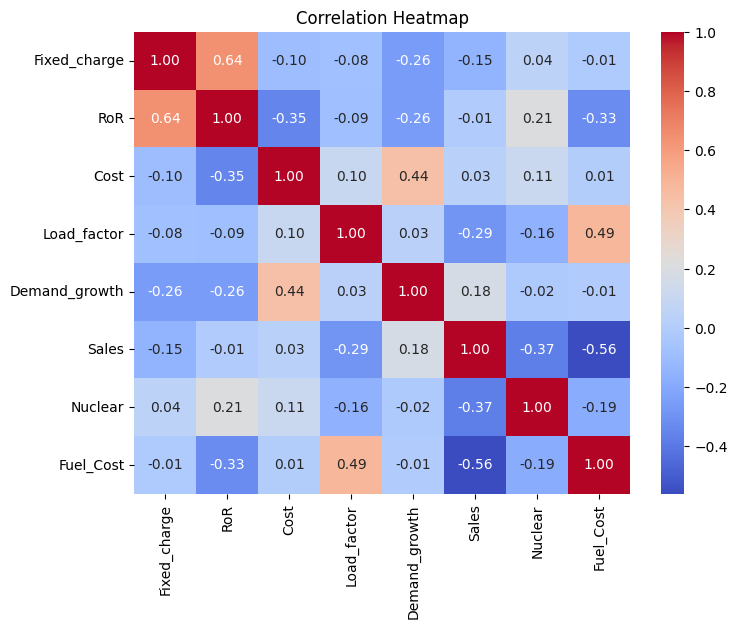

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
dfnum = df[numerical_columns]
corr_matrix = dfnum.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Text(0, 0.5, 'Fuel_Cost')

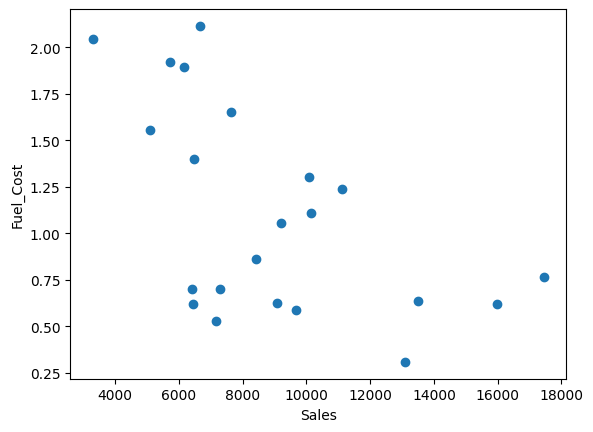

In [ ]:
plt.scatter(df.Sales,df['Fuel_Cost'])
plt.xlabel('Sales')
plt.ylabel('Fuel_Cost')

# KMeans

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,init = 'k-means++')
y_predicted = km.fit_predict(df[['Sales', 'Fuel_Cost']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 2, 0, 2, 2, 0, 2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 2, 2, 0],
      dtype=int32)

# Clustering Output Visualization

In [ ]:
df['cluster'] = y_predicted
df.head()

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost,cluster
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628,0
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555,2
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058,0
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700,2
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044,2


In [ ]:
df['cluster'] = km.labels_
df.head()

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost,cluster
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628,0
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555,2
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058,0
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700,2
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044,2


In [ ]:
km.cluster_centers_

array([[9.67542857e+03, 9.70142857e-01],
       [1.50052500e+04, 5.83250000e-01],
       [6.21454545e+03, 1.37600000e+00]])

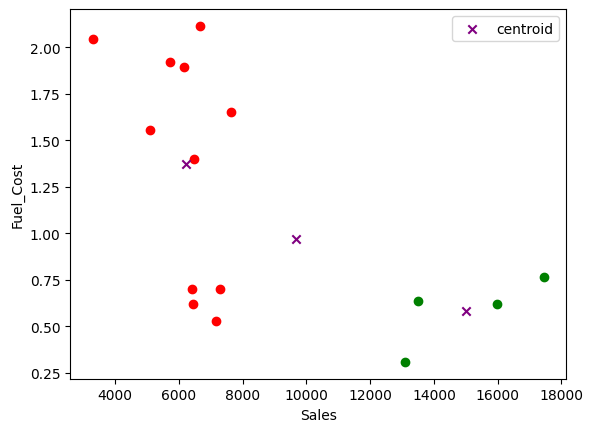

In [ ]:
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
df3 = df[df.cluster == 3]

# Scatter plot for each cluster
plt.scatter(df1.Sales, df1['Fuel_Cost'], color='green')
plt.scatter(df2.Sales, df2['Fuel_Cost'], color='red')
plt.scatter(df3.Sales, df3['Fuel_Cost'], color='black')

# Plotting centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            color='purple', marker='x', label='centroid')

# Adding labels and legend
plt.xlabel('Sales')
plt.ylabel('Fuel_Cost')
plt.legend()

# Processing using min max scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit and transform the data
scaler.fit(df[['Fuel_Cost']])
df['Fuel_Cost'] = scaler.transform(df[['Fuel_Cost']])

scaler.fit(df[['Sales']])
df['Sales'] = scaler.transform(df[['Sales']])

# Display the dataframe
df.head()

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost,cluster
0,Arizona,1.06,9.2,151,54.4,1.6,0.408528,0.0,0.176536,0
1,Boston,0.89,10.3,202,57.9,2.2,0.126441,25.3,0.689541,2
2,Central,1.43,15.4,113,53.0,3.4,0.418075,0.0,0.414499,0
3,Commonwealth,1.02,11.2,168,56.0,0.3,0.220847,34.3,0.216381,2
4,NY,1.49,8.8,192,51.2,1.0,0.000000,15.6,0.960155,2


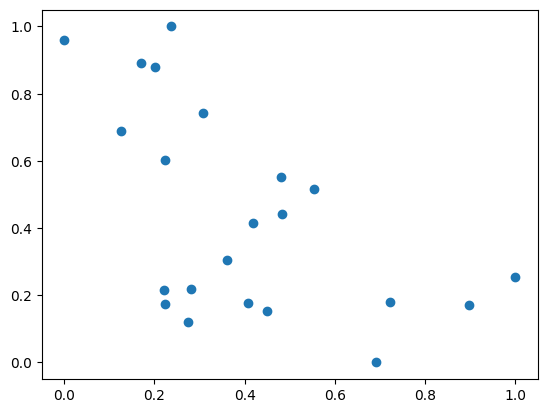

In [ ]:
plt.scatter(df.Sales, df['Fuel_Cost'])

In [ ]:
km = KMeans(n_clusters=3,init = 'k-means++')
y_predicted = km.fit_predict(df[['Sales', 'Fuel_Cost']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 0],
      dtype=int32)

In [ ]:
df['cluster'] = y_predicted
df.head()

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost,cluster
0,Arizona,1.06,9.2,151,54.4,1.6,0.408528,0.0,0.176536,0
1,Boston,0.89,10.3,202,57.9,2.2,0.126441,25.3,0.689541,1
2,Central,1.43,15.4,113,53.0,3.4,0.418075,0.0,0.414499,0
3,Commonwealth,1.02,11.2,168,56.0,0.3,0.220847,34.3,0.216381,0
4,NY,1.49,8.8,192,51.2,1.0,0.000000,15.6,0.960155,1


In [ ]:
km.cluster_centers_

array([[0.37783107, 0.29903909],
       [0.18099346, 0.82385959],
       [0.82775263, 0.15177089]])

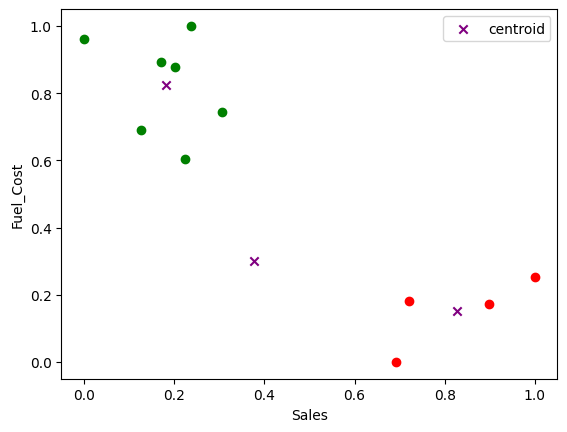

In [ ]:
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
df3 = df[df.cluster == 3]

# Scatter plot for each cluster
plt.scatter(df1.Sales, df1['Fuel_Cost'], color='green')
plt.scatter(df2.Sales, df2['Fuel_Cost'], color='red')
plt.scatter(df3.Sales, df3['Fuel_Cost'], color='black')

# Plotting centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            color='purple', marker='x', label='centroid')

# Adding labels and legend
plt.xlabel('Sales')
plt.ylabel('Fuel_Cost')
plt.legend()

# Elbow Plot to Identify Best K:

In [ ]:
wcss = []
K_rng = range(1, 10)
for K in K_rng:
    km = KMeans(n_clusters=K, init='k-means++')
    km.fit(df[['Sales', 'Fuel_Cost']])
    wcss.append(km.inertia_)
wcss

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[3.3123302529428647,
 1.3145972782546405,
 0.6571864115201366,
 0.3782285395854473,
 0.26016677520047216,
 0.18659848536730497,
 0.14293142670007672,
 0.1109699862929375,
 0.0904903066287302]

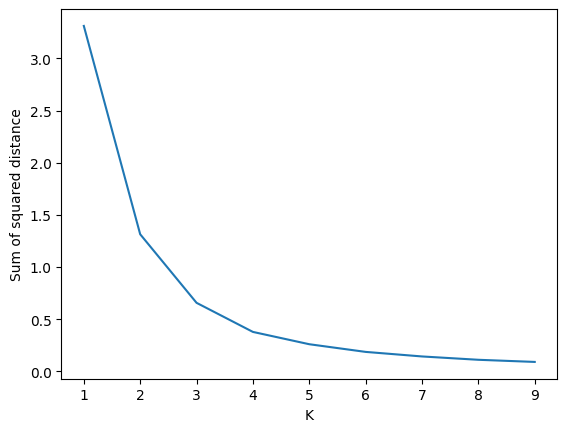

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared distance')
plt.plot(K_rng, wcss)

best K = 6